In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
import atomiche as A

In [5]:
def V_arm(r):
    from atomiche import K_CO
    return 0.5*K_CO*r**2

In [15]:
def V_morse(r, a=A.a_CO, D=A.D_CO):
    return D*(1-np.exp(-a*r))**2

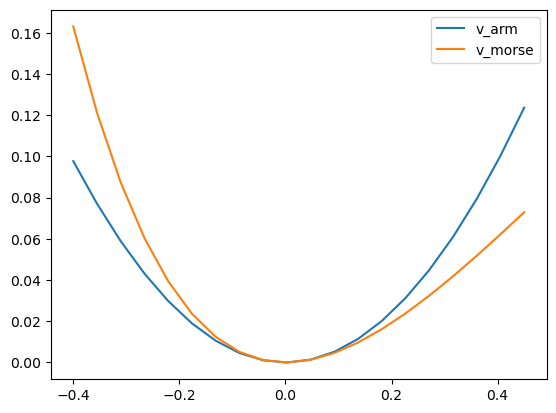

In [16]:
x=np.linspace(-0.4, 0.45, 20)
v_arm=V_arm(x)
v_morse=V_morse(x)
plt.plot(x,v_arm,label="v_arm")
plt.plot(x,v_morse, label="v_morse")
plt.legend()

In [87]:
Rb=np.linspace(-0.4, 0.4, 128)
def soluzioni_arm(r=Rb, n=10):
    "restituisce n soluzioni dell'oscillatore armonico, a partire dalla fondamentale"
    from atomiche import K_CO, μ_CO
    α=(K_CO*μ_CO)**0.5
    ω=(K_CO/μ_CO)**0.5
    sol=[]
    for i in range(n):
        fi=np.exp(-α/2*r**2)*r**i
        for j in range(i):
            fj=sol[j][1]
            ol=np.dot(fi, fj)
            fi=fi-ol*fj
        ol=np.dot(fi,fi)
        fi=fi/ol**0.5
        sol.append((ω*(0.5+i), fi))
    return sol

In [88]:
def H(ψ, r=Rb, m=A.μ_CO, V=V_arm):
    "restituisce Hψ, con l'energia cinetica valutata numericamente"
    d=r[1]-r[0]
    return -np.gradient(np.gradient(ψ))/d**2/2/m+V(r)*ψ
    

In [125]:
ψ_arm=soluzioni_arm(n=15)
e0,f0=ψ_arm[0]

In [126]:
hf0=H(f0)

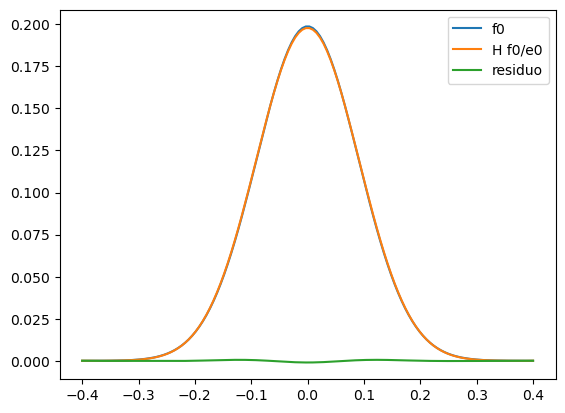

In [127]:
# verifichiamo che le soluzioni siano corrette
loc=np.argmax(np.abs(hf0))
residuo=(hf0-e0*f0)/e0
plt.plot(Rb,f0, label='f0')
plt.plot(Rb, hf0/e0, label='H f0/e0')
plt.plot(Rb, residuo, label='residuo')
plt.legend()

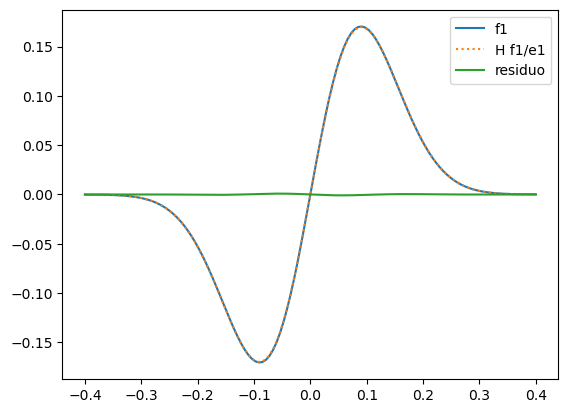

In [128]:
# verifica per ψ1
e1,f1=ψ_arm[1]
hf1=H(f1)
residuo=(hf1-e1*f1)/e1
plt.plot(Rb,f1, label='f1')
plt.plot(Rb, hf1/e1, ':',label='H f1/e1')
plt.plot(Rb, residuo, label='residuo')
plt.legend()
None

In [129]:
for i in range(1,10):
    print(f'il momento di dipolo tra f0 e f{i} è {np.dot(f0, Rb*ψ_arm[i][1])}')

il momento di dipolo tra f0 e f1 è 0.06361355388858284
il momento di dipolo tra f0 e f2 è 6.505213034913027e-19
il momento di dipolo tra f0 e f3 è 2.6020852139652106e-18
il momento di dipolo tra f0 e f4 è 1.3010426069826053e-18
il momento di dipolo tra f0 e f5 è -2.710505431213761e-18
il momento di dipolo tra f0 e f6 è 4.336808689942018e-19
il momento di dipolo tra f0 e f7 è 5.421010862427522e-18
il momento di dipolo tra f0 e f8 è -5.204170427930421e-18
il momento di dipolo tra f0 e f9 è -1.6479873021779667e-17


## analisi delle soluzioni anarmoniche

andiamo ora a rappresentare le soluzioni anarmoniche nella base delle soluzioni armoniche:
$$\psi^{an}_k=\sum_m Ψ_{km} ψ^{ar}_m$$
a questo scopo, le colonne $Ψ[k,:]$ della soluzione devono essere autovettori della matrice hamiltoniana:
$$H^{an}_{mn}=\langle \psi^{ar}_m | H^{an} | \psi^{ar}_n \rangle$$ 

In [131]:
def Hm_anar(base_arm):
    "restituisce la matrice rappresentazione di H_morse nella base base_arm"
    n=len(base_arm)
    res=np.zeros((n,n))
    for i in range(n):
        for j in range(i+1):
            h_ij=np.dot(base_arm[i][1], H(base_arm[j][1], V=V_morse))
            res[i,j]=h_ij
            res[j,i]=h_ij
    return res

In [132]:
Hm=Hm_anar(ψ_arm)

In [133]:
Hm[:2,:]

array([[ 4.96362724e-03, -5.84706985e-04,  9.25251562e-05,
        -4.81068709e-04,  3.40030735e-05, -3.28563320e-06,
         2.18200529e-07, -1.30111418e-08,  6.45983415e-08,
        -3.73519321e-11,  1.40767158e-07, -8.07114250e-14,
         2.17883032e-07, -1.45825192e-16,  2.61571371e-07],
       [-5.84706985e-04,  1.49322618e-02, -1.66013497e-03,
         2.67644567e-04, -9.69474094e-04,  7.66439909e-05,
        -8.07972938e-06,  7.38462846e-07, -3.67407957e-08,
         5.70243716e-07, -1.15119488e-10,  1.03818580e-06,
        -2.57335819e-13,  1.39843753e-06, -4.50702843e-16]])

In [134]:
E_an, Ψ_an=la.eigh(Hm)

In [154]:
Ψ_an[:,0]

array([ 9.98148749e-01,  5.85456275e-02,  2.64178497e-03,  1.60678934e-02,
        2.43679501e-03,  1.91972464e-04,  5.77841677e-04,  1.39325015e-04,
        1.33369700e-05,  2.49266457e-05,  5.10242984e-06, -3.05953395e-06,
       -3.19627373e-06, -3.96053438e-06, -4.12066789e-06])

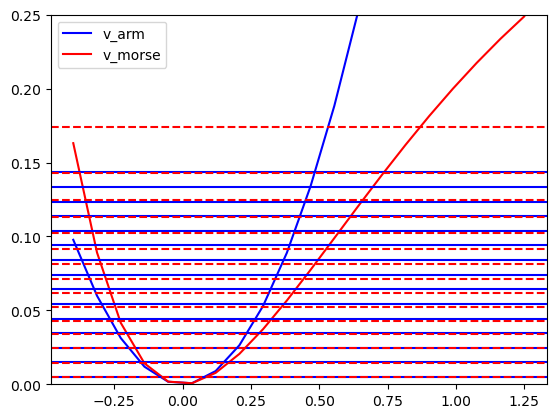

In [135]:
x=np.linspace(-0.4, 1.25, 20)
v_arm=V_arm(x)
v_morse=V_morse(x)
plt.plot(x,v_arm, color="blue", label="v_arm")
plt.plot(x,v_morse, color="red", label="v_morse")
for v in ψ_arm:
    plt.axhline(v[0], color="blue")
for v in E_an:
    plt.axhline(v, ls="--", color="red")
plt.ylim(0,0.25)
plt.legend()
None

In [142]:
 def ψ_an(i):
    n=len(Hm)
    res=np.zeros(len(ψ_arm[0][1]))
    for k in range(n):
        res+=Ψ_an[k,i]*ψ_arm[k][1]
    return res

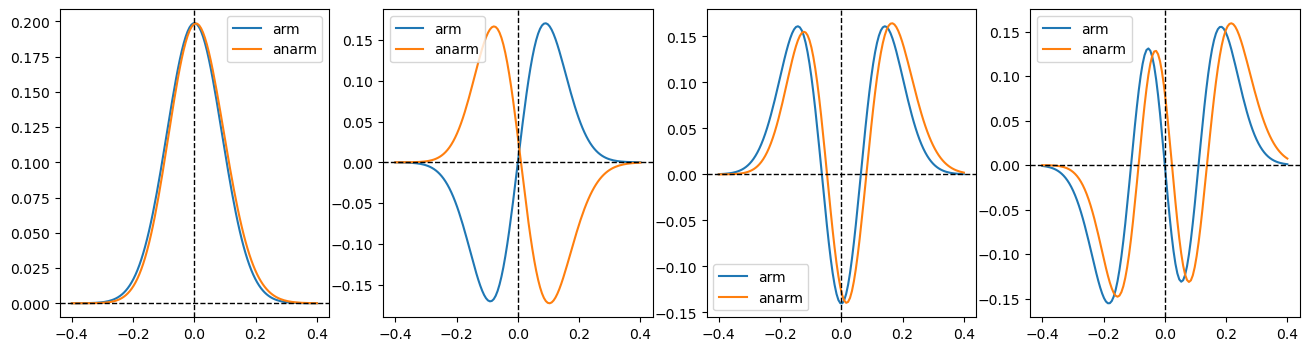

In [152]:
fig, axs=plt.subplots(figsize=(16,4), ncols=4)
for i in range(4):
    axs[i].plot(Rb, ψ_arm[i][1], label="arm")
    axs[i].plot(Rb, ψ_an(i), label="anarm")
    axs[i].axhline(0, color="black", ls="--", lw=1)
    axs[i].axvline(0, color="black", ls="--", lw=1)
    axs[i].legend()


In [147]:
for i in range(1,10):
    print(f'il momento di dipolo tra f0 e f{i} è {np.dot(ψ_an(0), Rb*ψ_an(i))}')

il momento di dipolo tra f0 e f1 è -0.06373161132601562
il momento di dipolo tra f0 e f2 è -0.003511790524987058
il momento di dipolo tra f0 e f3 è 0.00040732138357816715
il momento di dipolo tra f0 e f4 è -6.972537611331663e-05
il momento di dipolo tra f0 e f5 è 1.4871034411122891e-05
il momento di dipolo tra f0 e f6 è -3.2586982226170003e-06
il momento di dipolo tra f0 e f7 è -9.419156993127793e-07
il momento di dipolo tra f0 e f8 è 1.630527623002441e-07
il momento di dipolo tra f0 e f9 è -8.907572708691941e-08


## esercizio
verificare come abbiamo fatto sopra per le soluzioni armoniche, entro quali limiti le soluzioni anarmoniche sono corrette